In [3]:
#Getting system ready and loading the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sn


#train 
#test 
#sample

#reading data
train=pd.read_csv('loans_full_schema.csv')
train
test=pd.read_csv('loans_full_schema.csv')
test

#copy of train and test dataset

train_orignal=train.copy()
test_orignal=test.copy()


In [4]:
train.shape

(10000, 55)

In [109]:
#understanding the data

train.columns

#we have 1 target variable(dependent variable) in train dataset

test.columns
test.drop(['num_historical_failed_to_pay'],axis=1,inplace=True)
test.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'months_since_90d_late',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_120d_past_due', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'ap

In [110]:
train.shape

(10000, 55)

In [111]:
test.shape

(10000, 54)

In [112]:
train.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

<AxesSubplot:>

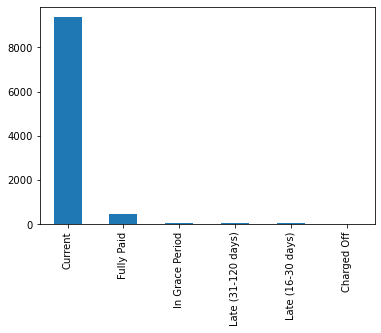

In [113]:
#Exploratory Data Analysis

#Univariate analysis

train['loan_status'].value_counts()
train['loan_status'].value_counts(normalize=True) #shows proportions
train['loan_status'].value_counts().plot.bar()

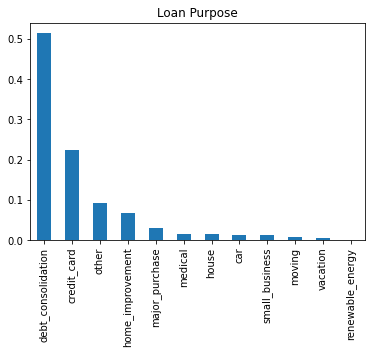

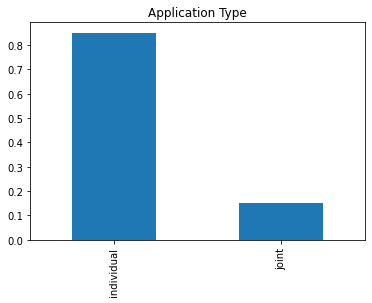

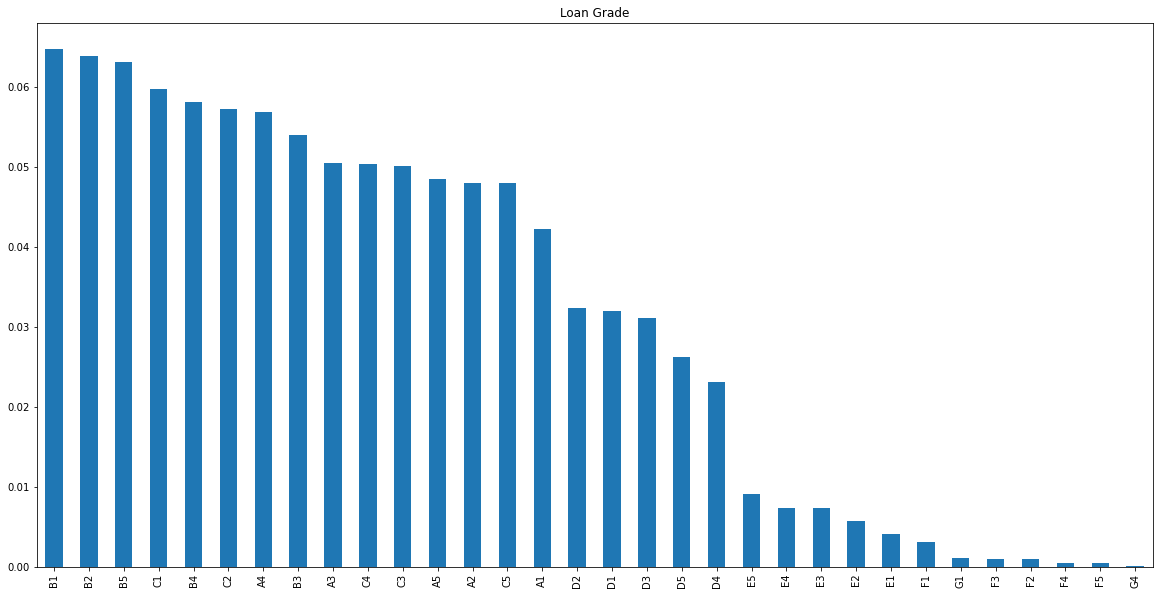

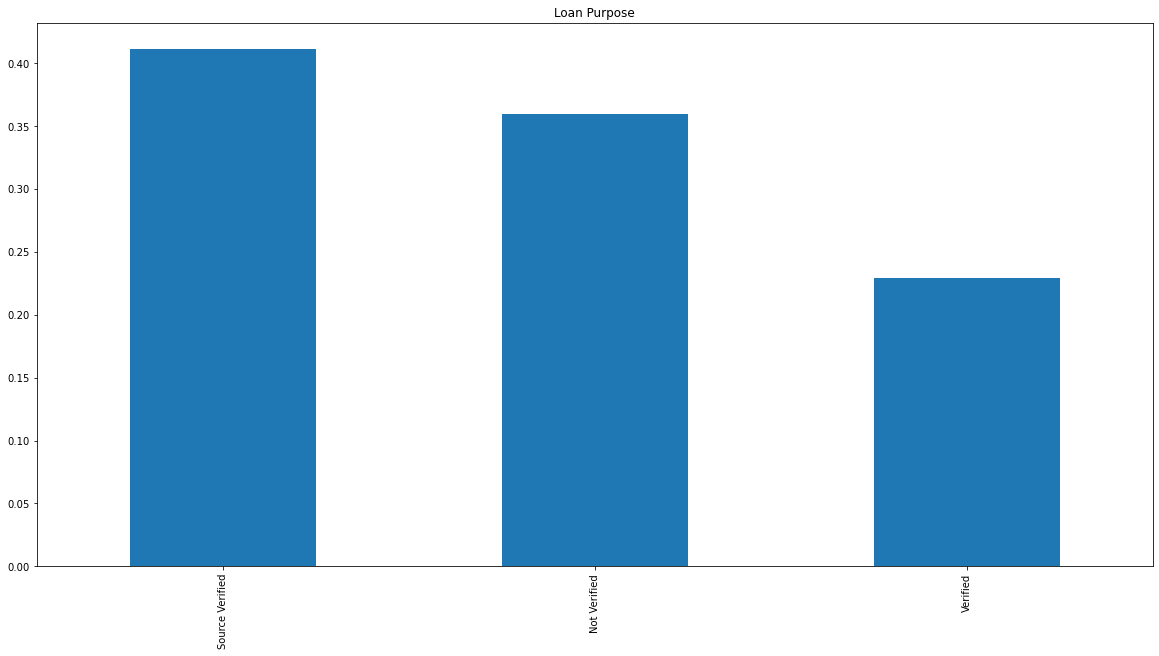

In [114]:
# Independent variables (Categorical Variables)

train['loan_purpose'].value_counts(normalize=True).plot.bar(title="Loan Purpose")
plt.show()
train['application_type'].value_counts(normalize=True).plot.bar(title="Application Type")
plt.show()
train['sub_grade'].value_counts(normalize=True).plot.bar(title="Loan Grade",figsize=(20,10))
plt.show()
train['verified_income'].value_counts(normalize=True).plot.bar(title="Loan Purpose",figsize=(20,10))
plt.show()

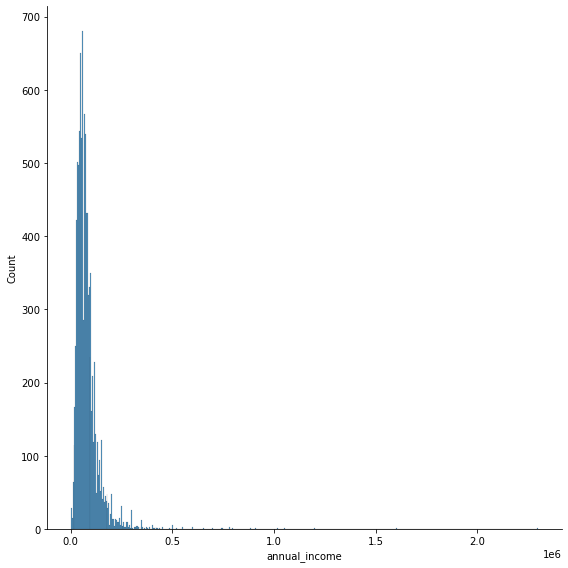

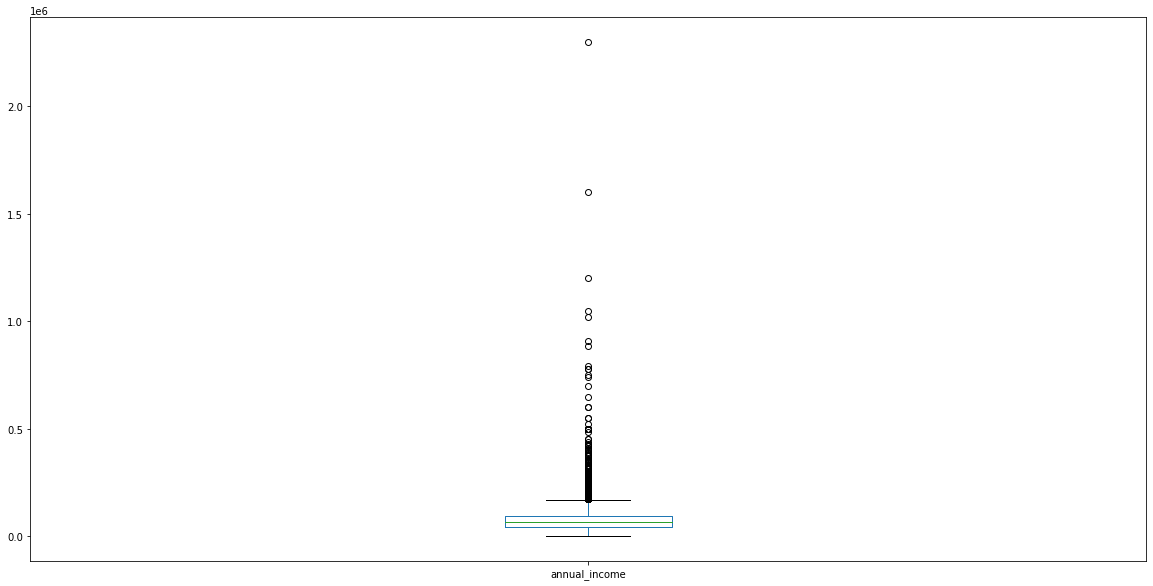

In [115]:
#Idependent Variable (Numerical)

sn.displot(train['annual_income'],legend=True,height=8)#,aspect=10)
#plt.legend()
plt.show()
train['annual_income'].plot.box(figsize=(20,10))
plt.show()


<AxesSubplot:title={'center':'annual_income'}, xlabel='homeownership'>

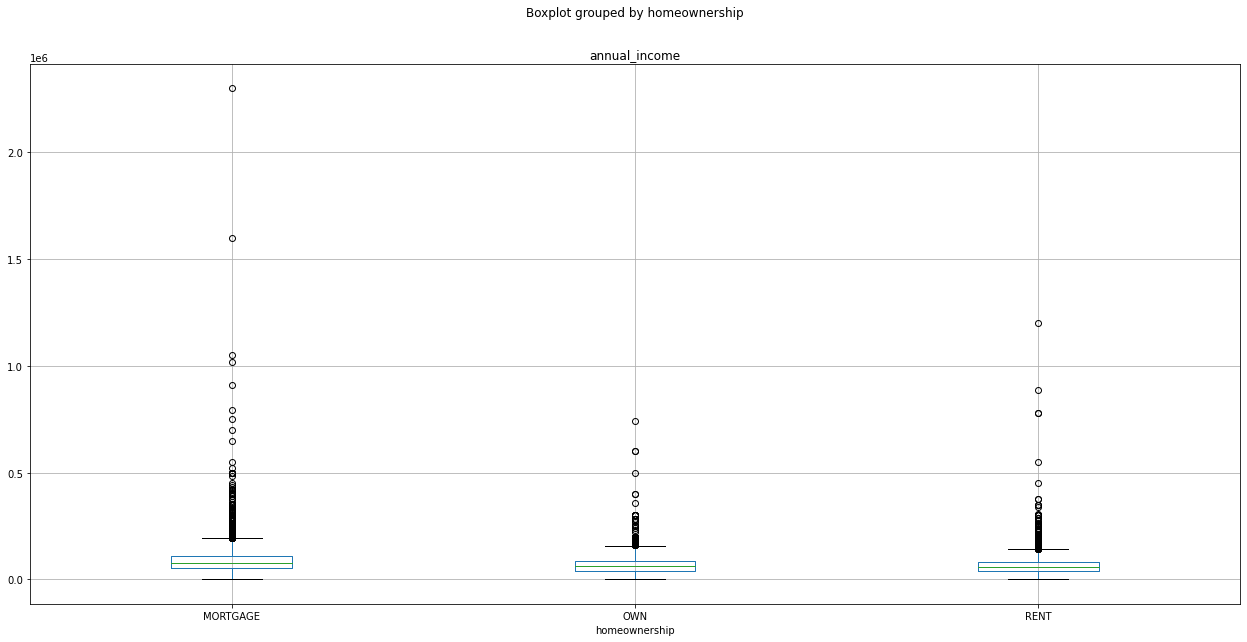

In [116]:
train.boxplot(column="annual_income",by="homeownership",figsize=(21,10))

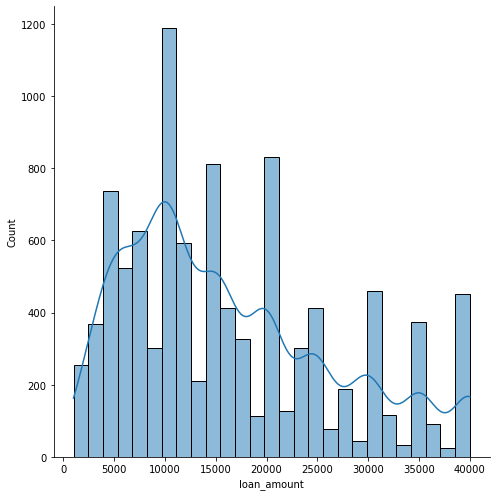

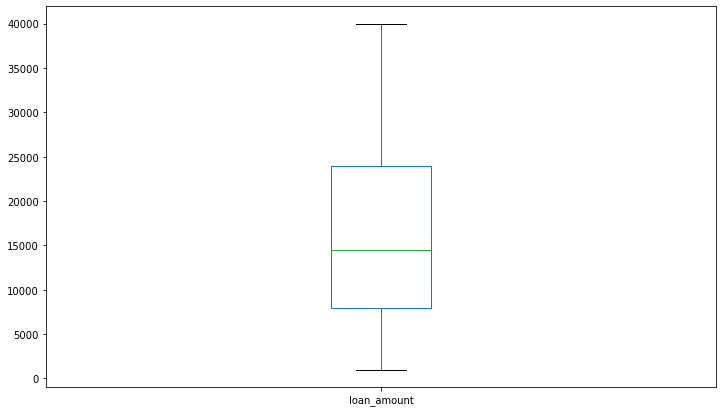

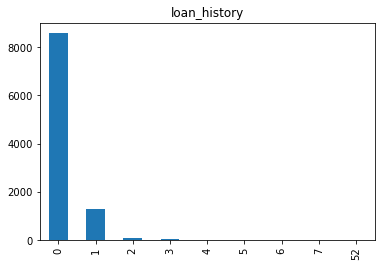

In [117]:
train.notna()
sn.displot(train['loan_amount'],kde=True,height=7)
plt.show()
train['loan_amount'].plot.box(figsize=(12,7))
plt.show()
train['num_historical_failed_to_pay'].value_counts().plot.bar()
plt.title('loan_history')
plt.show()

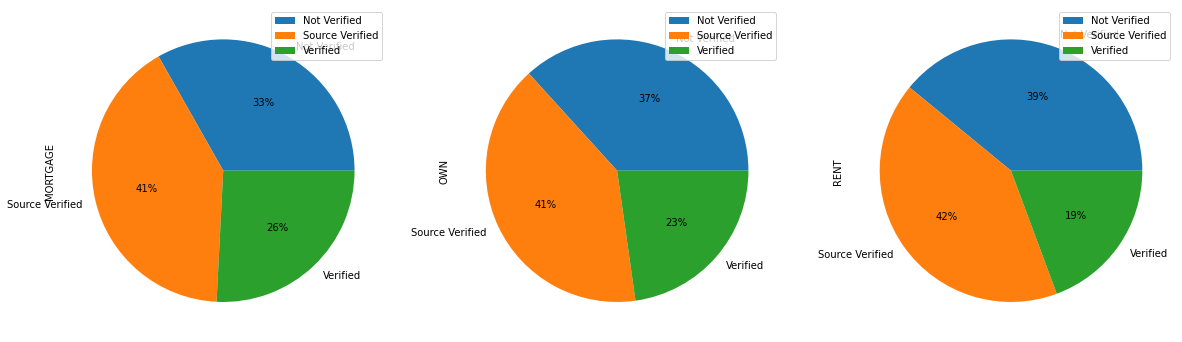

In [118]:
# Bivariate analysis

# Categorical Independent variable vs Target variable
# We will find relation between categorical independent and target variables .

hom_ship=pd.crosstab(train['verified_income'],train['homeownership'])
hom_ship.plot.pie(subplots=True,figsize=(20,10),autopct='%1.0f%%')
#hom_ship.div(hom_ship.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))
plt.legend(loc='best')
plt.show()


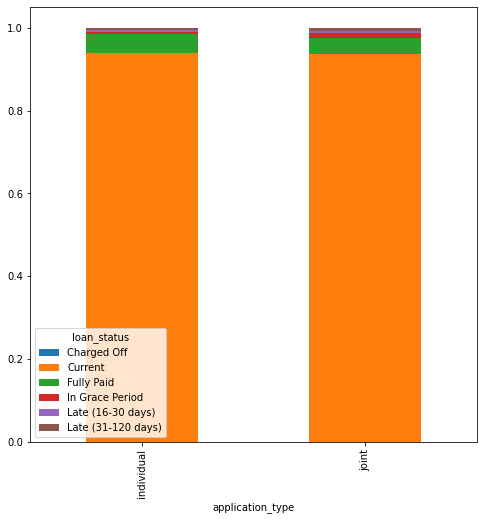

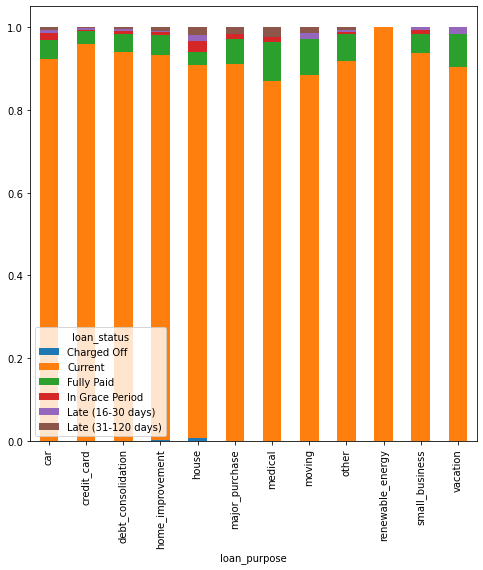

In [119]:
#remaining categorical variables
ap_type=pd.crosstab(train['application_type'],train['loan_status'])
lo_pur=pd.crosstab(train['loan_purpose'],train['loan_status'])

ap_type.div(ap_type.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))
plt.show()
lo_pur.div(lo_pur.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(8,8))
plt.show()

<AxesSubplot:xlabel='loan_status'>

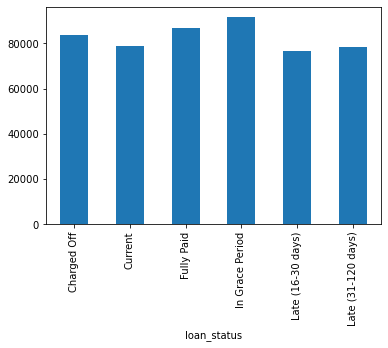

In [120]:
# Numerical independent vs target varaible
train['annual_income'].groupby(train['loan_status']).mean().plot.bar()


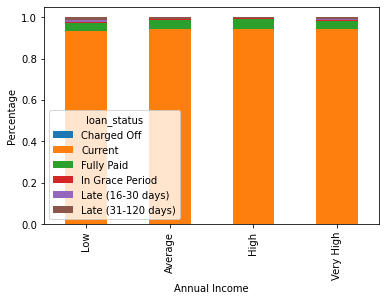

In [121]:
bins=[0,25000,40000,60000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['annual_income'],bins,labels=group)
#train['Income_bin']
Income_bin=pd.crosstab(train['Income_bin'],train['loan_status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)
plt.xlabel('Annual Income')
plt.ylabel('Percentage')
plt.show()


<AxesSubplot:xlabel='loan_status'>

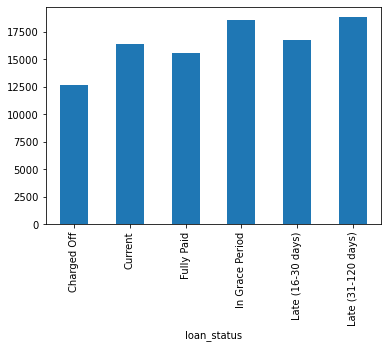

In [7]:
train['loan_amount'].groupby(train['loan_status']).mean().plot.bar()
# There are noticable diffrence in mean of loan amount

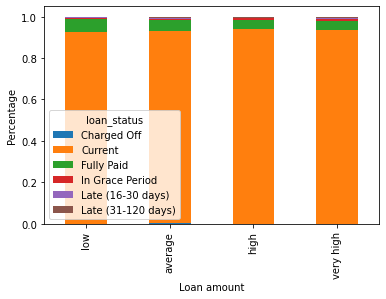

In [123]:
bins=[0,2500,7500,12500,15500]
group=['low','average','high','very high']
train['loan_amount_bin']=pd.cut(train['loan_amount'],bins,labels=group)
loan_amount_bin=pd.crosstab(train['loan_amount_bin'],train['loan_status'])
loan_amount_bin.div(loan_amount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Loan amount')
plt.ylabel('Percentage')
plt.show()



In [124]:
train.drop(['loan_amount_bin','Income_bin'],axis=1,inplace=True)

<AxesSubplot:>

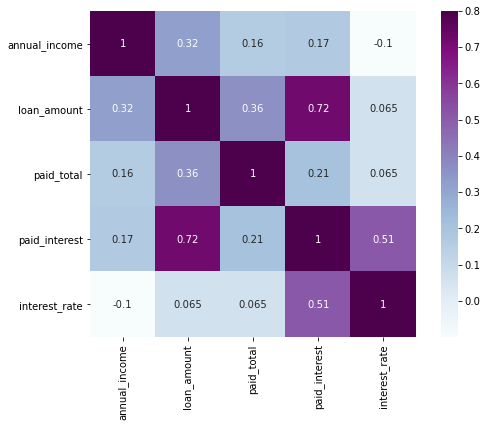

In [125]:
# Correlation between all the numerical variables
train1=train[['annual_income','loan_amount','paid_total','paid_interest','interest_rate']]
matrix=train1.corr()
f,ax=plt.subplots(figsize=(9,6))
sn.heatmap(matrix,vmax=.8,square=True,cmap="BuPu",annot=True)

In [126]:
# Missing value imputation
train.isnull().sum()
# For numerical varaibles we fill using mean,median
# For categorical varaibles we fill using mode

# There are few missing values in debt_to_income,num_accounts,emp_length, many missing values in annual_income_joint,
# verification_income_joint,debt_to_income_joint


emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [127]:
# Filling the missing numerical values
train['num_accounts_120d_past_due'].fillna(train['num_accounts_120d_past_due'].mean(),inplace=True)
train['debt_to_income'].fillna(train['debt_to_income'].mean(),inplace=True)
train['emp_length'].fillna(train['emp_length'].mean(),inplace=True)
train.head(10)

# Filling missing values with categorical variables
train['emp_title'].fillna(train['emp_title'].mode()[0],inplace=True)


In [128]:
# Using the same approach on test dataset
#test.isnull().sum()
# Filling the missing numerical values
test['num_accounts_120d_past_due'].fillna(test['num_accounts_120d_past_due'].mean(),inplace=True)
test['debt_to_income'].fillna(test['debt_to_income'].mean(),inplace=True)
test['emp_length'].fillna(test['emp_length'].mean(),inplace=True)
test.head(10)
# Filling missing values with categorical variables
test['emp_title'].fillna(test['emp_title'].mode()[0],inplace=True)


In [129]:
# Deleting columns
train.drop('annual_income_joint',axis=1,inplace=True)
train.drop('verification_income_joint',axis=1,inplace=True)
train.drop('debt_to_income_joint',axis=1,inplace=True)
train.drop('months_since_last_delinq',axis=1,inplace=True)
train.drop('months_since_90d_late',axis=1,inplace=True)
train.drop('months_since_last_credit_inquiry',axis=1,inplace=True)

# For test dataset
test.drop('annual_income_joint',axis=1,inplace=True)
test.drop('verification_income_joint',axis=1,inplace=True)
test.drop('debt_to_income_joint',axis=1,inplace=True)
test.drop('months_since_last_delinq',axis=1,inplace=True)
test.drop('months_since_90d_late',axis=1,inplace=True)
test.drop('months_since_last_credit_inquiry',axis=1,inplace=True)


In [130]:
train.shape

(10000, 49)

In [131]:
test.shape

(10000, 48)

In [132]:
# Model Building Part-I

# Logistic Regression

X = train.drop('num_historical_failed_to_pay',1)
y = train.num_historical_failed_to_pay


In [133]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [135]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

C:\Users\Mayur Pawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8603333333333333

In [138]:
pred_test = model.predict(test)

In [142]:
submission = pd.read_csv('submission.csv')
submission.head()

,emp_title
0,global config engineer
1,warehouse office clerk
2,assembly
3,customer service
4,security supervisor


In [149]:
submission['emp_title']=submission.drop(columns=['emp_title'][9168:],axis=1)
submission['Predicted_historical_failed_to_pay']=pd.Series(pred_test)


In [156]:
#  we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.
submission['Predicted_historical_failed_to_pay'].replace(0, 'N', inplace=True)
submission['Predicted_historical_failed_to_pay'].replace(1, 'Y', inplace=True)

In [159]:
# we will convert the submission to .csv format
pd.DataFrame(submission, columns=["Emp_title","Predicted_historical_failed_to_pay"]).to_csv('logistic.csv')

In [160]:
# Model Building part II
X = train.drop('num_historical_failed_to_pay',1)
y = train.num_historical_failed_to_pay


In [165]:
# Stratified KFold cross-vaildation

from sklearn.model_selection import StratifiedKFold
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

C:\Users\Mayur Pawar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"



1 of kfold 5 


C:\Users\Mayur Pawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.859

2 of kfold 5 


C:\Users\Mayur Pawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.8575

3 of kfold 5 


C:\Users\Mayur Pawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.8575

4 of kfold 5 


C:\Users\Mayur Pawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.8585

5 of kfold 5 


C:\Users\Mayur Pawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.8585

 Mean Validation Accuracy 0.8582000000000001


In [167]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

C:\Users\Mayur Pawar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"



1 of kfold 5 
accuracy_score 0.859

2 of kfold 5 
accuracy_score 0.8585

3 of kfold 5 
accuracy_score 0.8585

4 of kfold 5 
accuracy_score 0.8585

5 of kfold 5 
accuracy_score 0.8585

 Mean Validation Accuracy 0.8586
